## Import packages

In [1]:
import os
import urllib.request
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import itertools
import time

## Loading dataset

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploring Data Analysis

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

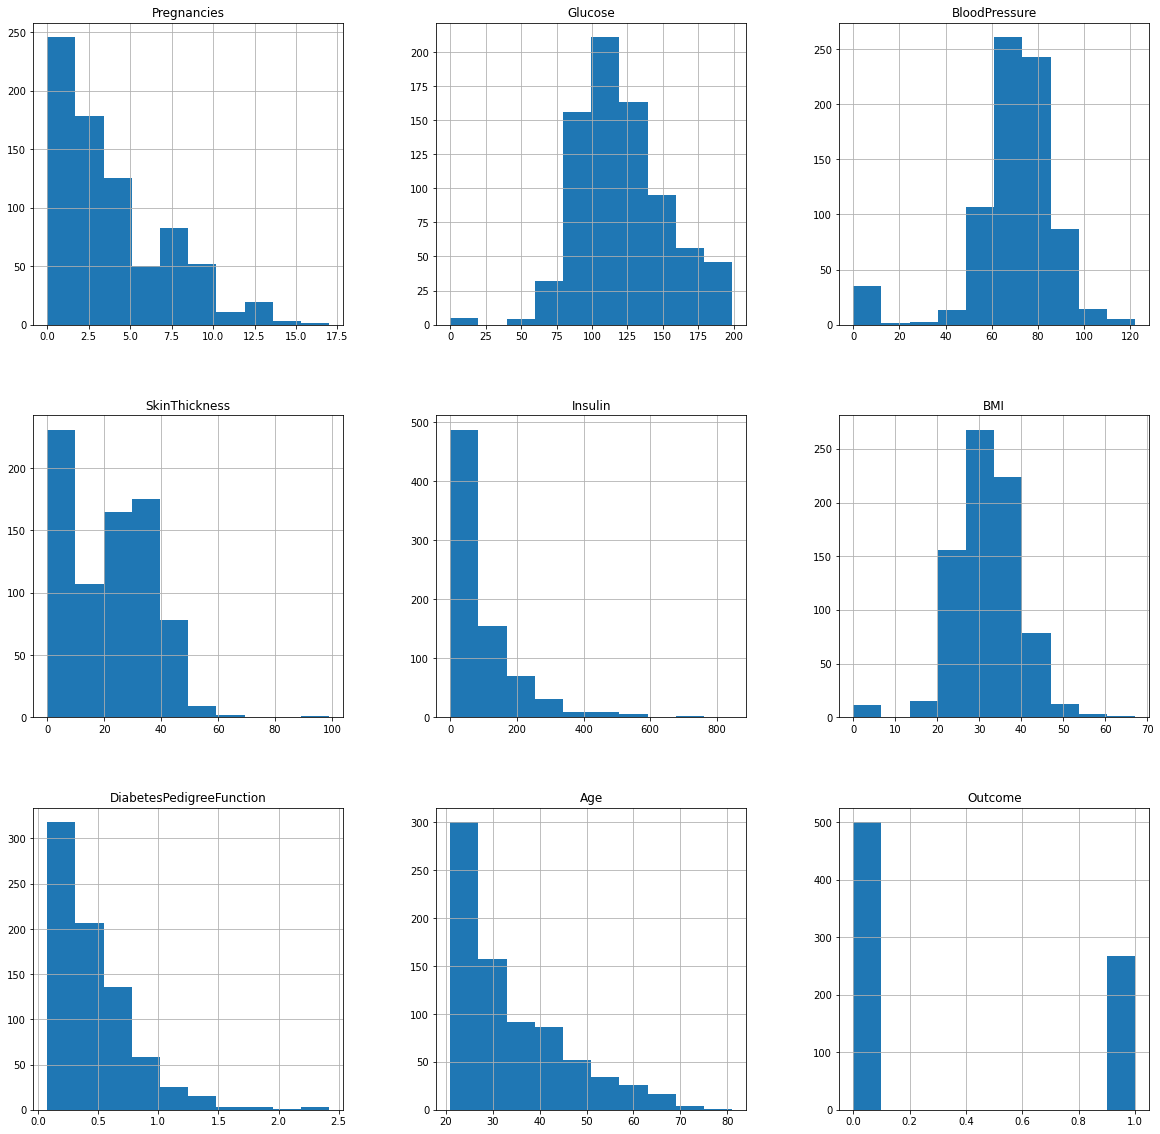

In [6]:
p = df.hist(figsize = (20,20))

In [7]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

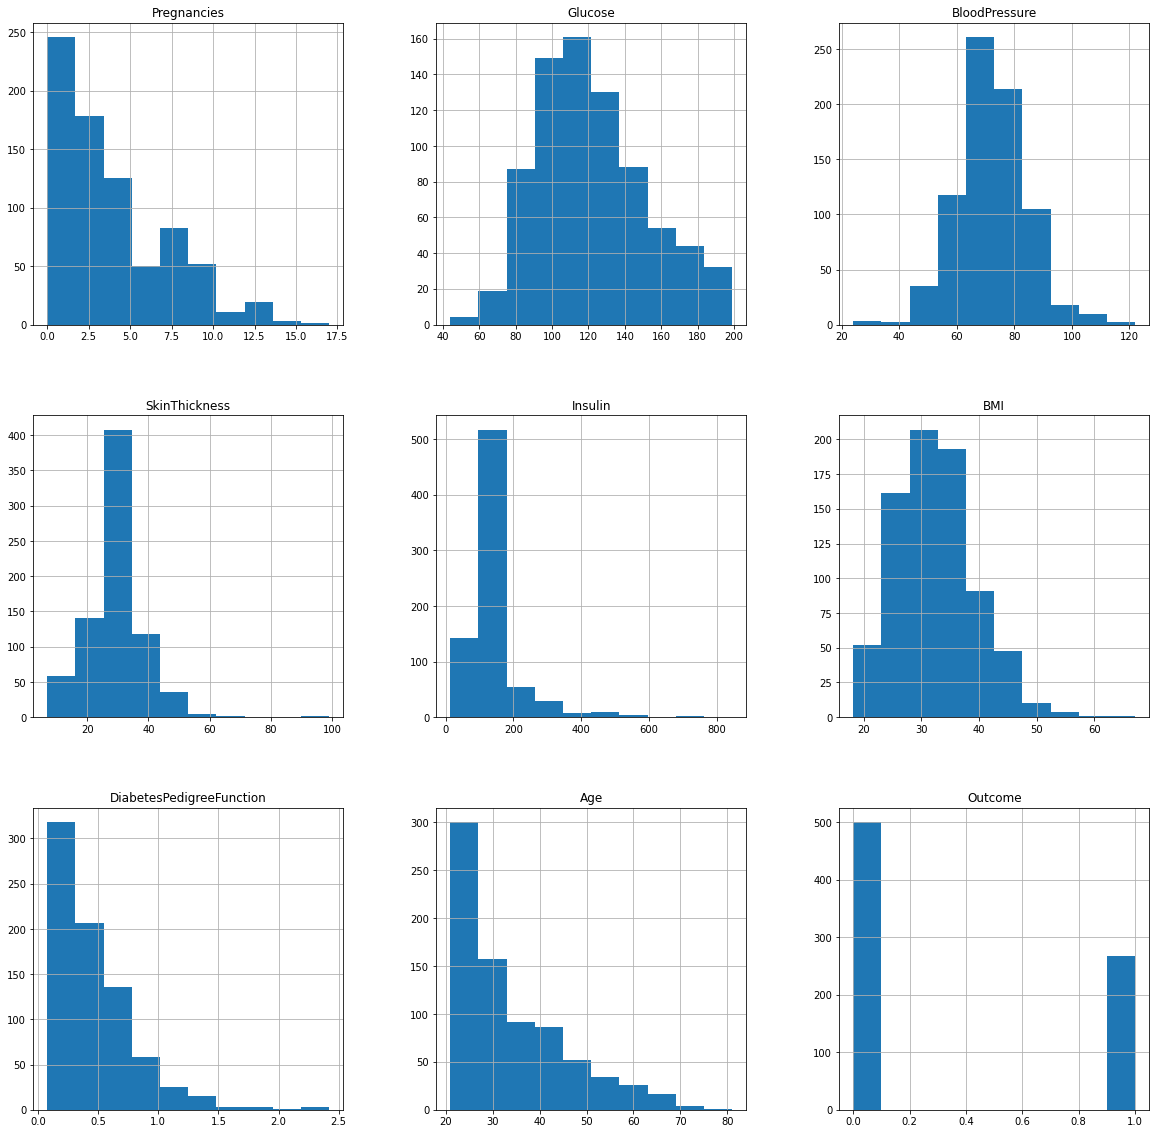

In [9]:
p = df_copy.hist(figsize = (20,20))

In [10]:
##############

In [11]:
# Normalization

In [12]:
X = df_copy.drop('Outcome', 1)
y = df_copy['Outcome']

In [13]:
X_ = StandardScaler().fit_transform(X.values)
X_

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [14]:
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Some useful functions

In [15]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
  
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [16]:
def get_metrics(intro_text, y_true, y_predicted):
    print("\n" + intro_text + "\n")
    print("Accuracy: ",round(accuracy_score(y_true, y_predicted),3))
    print("Precision: ",round(precision_score(y_true, y_predicted),3))
    print("Recall: ",round(recall_score(y_true, y_predicted),3))
    print("Balanced accuracy: ",round(balanced_accuracy_score(y_true, y_predicted),3))

## Logistic Regression

In [48]:
X = X
y = y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [49]:
# Train model with default values
model_reg = LogisticRegression(random_state=0, max_iter=1000)
scores = cross_val_score(model_reg, X_train, y_train, cv=5, scoring='accuracy')

print('Mean: ', round(np.mean(scores),4))
print('STD: ', round(np.std(scores),4))

Mean:  0.7639
STD:  0.0358


In [50]:
# find optimal alpha with grid search

param_grid = {"C":np.logspace(-3,3,7), 
              "penalty":["l1","l2"]} # l1 lasso l2 ridge

grid = RandomizedSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7638830584707645
Best Params:  {'penalty': 'l2', 'C': 1.0}


In [51]:
# Train model with best parameters
model_reg = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
cv_results = cross_validate(model_reg, X, y, scoring='accuracy', cv=5, return_train_score=True)

print("\nTraining Time")
print('Mean: ', round(np.mean(cv_results['fit_time']),6))
print('STD: ', round(np.std(cv_results['fit_time']),6))

print("\nTrain Accuracy")
print('Mean: ', round(np.mean(cv_results['train_score']),4))
print('STD: ', round(np.std(cv_results['train_score']),4))

print("\nTest Accuracy")
print('Mean: ', round(np.mean(cv_results['test_score']),4))
print('STD: ', round(np.std(cv_results['test_score']),4))


Training Time
Mean:  0.003902
STD:  0.000208

Train Accuracy
Mean:  0.7744
STD:  0.006

Test Accuracy
Mean:  0.7709
STD:  0.0163


In [52]:
model_reg = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)

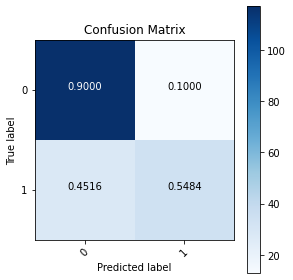

In [53]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, normalize = True, target_names = ['0', '1'], title = "Confusion Matrix")

In [54]:
get_metrics("Logistic Regression", y_test, y_pred)


Logistic Regression

Accuracy:  0.786
Precision:  0.723
Recall:  0.548
Balanced accuracy:  0.724


## Support Vector Machine

In [55]:
X = X
y = y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
# Train model with default values

model_svm = svm.SVC(kernel='rbf')
scores = cross_val_score(model_svm, X_train, y_train, cv=5, scoring='accuracy')

print('Mean: ', round(np.mean(scores),4))
print('STD: ', round(np.std(scores),4))

Mean:  0.7344
STD:  0.0508


In [57]:
# Find optimal alpha with grid search

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = RandomizedSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)
 
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7621589205397301
Best Params:  {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}


In [58]:
# Train model with best parameters
model_svm = svm.SVC(kernel='rbf', C=100, gamma=0.001)
cv_results = cross_validate(model_svm, X, y, scoring='accuracy', cv=5, return_train_score=True)

print("\nTraining Time")
print('Mean: ', round(np.mean(cv_results['fit_time']),6))
print('STD: ', round(np.std(cv_results['fit_time']),6))

print("\nTrain Accuracy")
print('Mean: ', round(np.mean(cv_results['train_score']),4))
print('STD: ', round(np.std(cv_results['train_score']),4))

print("\nTest Accuracy")
print('Mean: ', round(np.mean(cv_results['test_score']),4))
print('STD: ', round(np.std(cv_results['test_score']),4))


Training Time
Mean:  0.011111
STD:  0.000863

Train Accuracy
Mean:  0.7767
STD:  0.0067

Test Accuracy
Mean:  0.7709
STD:  0.0183


In [59]:
model_svm = svm.SVC(kernel='rbf', C=100, gamma=0.001)
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

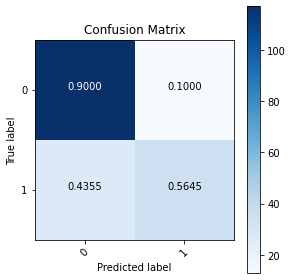

In [60]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, normalize = True, target_names = ['0', '1'], title = "Confusion Matrix")

In [61]:
get_metrics("Support Vector Machine", y_test, y_pred)


Support Vector Machine

Accuracy:  0.792
Precision:  0.729
Recall:  0.565
Balanced accuracy:  0.732


## Random Forests

In [62]:
X = X
y = y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [63]:
# Train model with default values
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

print('Mean: ', round(np.mean(scores),4))
print('STD: ', round(np.std(scores),4))

Mean:  0.7275
STD:  0.0463


In [64]:
# Find optimal with grid search

param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion':['gini', 'entropy']}

grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.7639580209895053
Best Params:  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'}


In [65]:
# Train model with best parameters
model_rf = RandomForestClassifier(criterion='gini', max_depth=4, max_features='log2', n_estimators = 500)
cv_results = cross_validate(model_rf, X, y, scoring='accuracy', cv=5, return_train_score=True)

print("\nTraining Time")
print('Mean: ', round(np.mean(cv_results['fit_time']),6))
print('STD: ', round(np.std(cv_results['fit_time']),6))

print("\nTrain Accuracy")
print('Mean: ', round(np.mean(cv_results['train_score']),4))
print('STD: ', round(np.std(cv_results['train_score']),4))

print("\nTest Accuracy")
print('Mean: ', round(np.mean(cv_results['test_score']),4))
print('STD: ', round(np.std(cv_results['test_score']),4))


Training Time
Mean:  0.71187
STD:  0.013721

Train Accuracy
Mean:  0.8275
STD:  0.0115

Test Accuracy
Mean:  0.7566
STD:  0.0351


In [66]:
model_rf = RandomForestClassifier(criterion='gini', max_depth=4, max_features='log2', n_estimators = 500)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

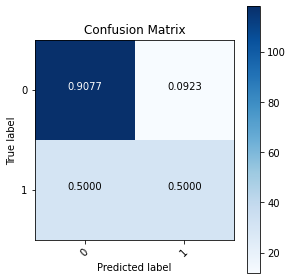

In [67]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, normalize = True, target_names = ['0', '1'], title = "Confusion Matrix")

In [68]:
get_metrics("Random Forests", y_test, y_pred)


Random Forests

Accuracy:  0.776
Precision:  0.721
Recall:  0.5
Balanced accuracy:  0.704
